In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,discriminant_analysis,cross_validation

In [5]:
# 加载数据方法，这里使用scikit-learn自带的糖尿病病人的数据集
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target,test_size=0.25,random_state=0)

In [6]:
# ElasticNet回归模型
def test_ElasticNet(*data):
    train_x,test_x, train_y, test_y = data
    regr = linear_model.ElasticNet()
    regr.fit(train_x, train_y)
    
    # y=wx+b  分别显示权重及b值
    print('【权重】coefficient:{0}'.format(regr.coef_))
    print('【b值】intercept: {0}'.format(regr.intercept_))
    # 均方差
    print('【均方差】residual sum of squares:{0}'.format(np.mean((regr.predict(test_x) -test_y)**2)))
    # 成绩
    print('【成绩】Testing Score: {0}'.format(regr.score(test_x,test_y)))

In [7]:
# 用糖尿病数据进行测试
train_x,test_x, train_y, test_y = load_data()
test_ElasticNet(train_x, test_x, train_y, test_y)

【权重】coefficient:[ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707]
【b值】intercept: 151.92763641451165
【均方差】residual sum of squares:4922.355075721768
【成绩】Testing Score: 0.008472003027015784


In [29]:
# 不同的α ρ对结果的影响
def test_ElasticNet_alpha_rho(*data):
    train_x,test_x, train_y, test_y = load_data()
    alphas = np.logspace(-2, 2)
    rhos = np.linspace(0.01, 1)
    test_score = []
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha=alpha,l1_ratio=rho)
            regr.fit(train_x,train_y)
            test_score.append(regr.score(test_x,test_y))
        
    # 绘图：
    alphas,rhos = np.meshgrid(alphas, rhos)
    test_score = np.array(test_score).reshape(alphas.shape)
    
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.view_init(elev=10, azim=11)
    surf = ax.plot_surface(alphas,rhos,test_score,rstride=1,cstride=1,cmap=cm.jet,linewidth=0,antialiased=False)
    fig.colorbar(surf,shrink=0.5,aspect=5)

    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\rho$')
    ax.set_zlabel(r'score')
    ax.set_title('ElasticNet')
    plt.show()

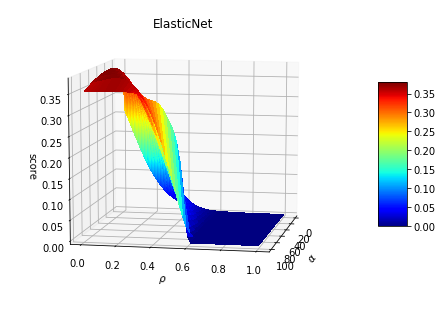

In [30]:
# 用糖尿病数据进行测试
train_x,test_x, train_y, test_y = load_data()
test_ElasticNet_alpha_rho(train_x, test_x, train_y, test_y)